In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

from __future__ import division
import math



In [2]:
df = pd.read_csv('cleaned_vg_df.csv')

In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
def reg_model (datax, datay):
    # computes the y=mx+b regression.
    #returns the slope and intercept
    x = datax
    y = datay
    fit = np.polyfit(x,y,1)
    
    fit_fn = np.poly1d(fit)
    return fit_fn

def resi_calc (datax, datay):
    # returns the residuals
    r, p = stats.pearsonr(datax, datay)
    slope = (datay.std() / datax.std()) * r * (-np.mean(datax))
    y_hat = slope * datax + np.mean(datay)
    
    residuals = datay - y_hat
    return residuals


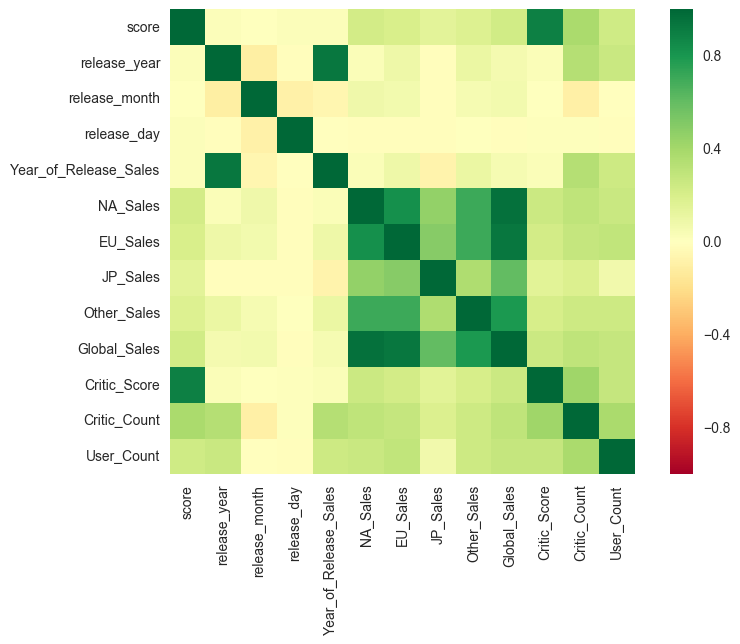

In [5]:
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')


## November is the best month for Video Games

Using ANOVA

Ho: There is no association between release months and global sales

Ha: There is an association between release months and global sales


ANOVA only finds the difference in means and association but cannot find which release month is better and by how much. 



We already see that November is the best month for video games to be released in general. Are the sales in November statistically significant? 

In [6]:
#only going to include data that have matching years (since they're both from two different sources)

df = df[(df.release_year == df.Year_of_Release_Sales)]


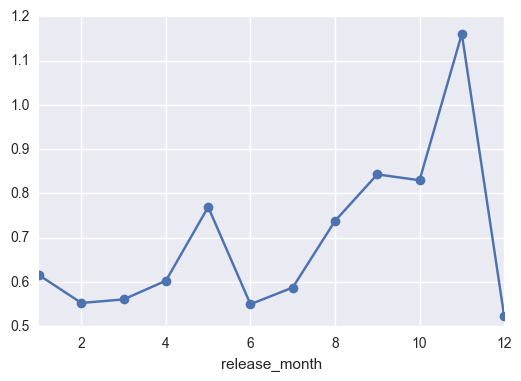

In [7]:
df.groupby('release_month')['Global_Sales'].mean().plot(marker='o', linestyle='-')
#simulate their means

#means are far apart, suspicious of the null hypothesis 

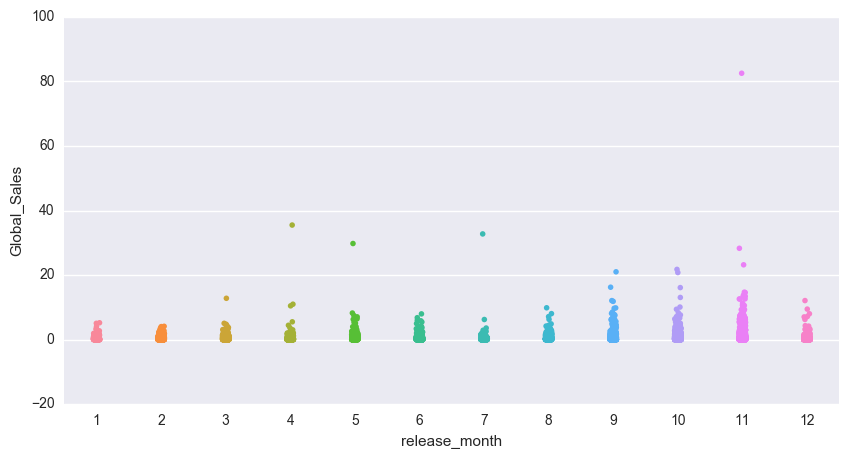

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
sns.stripplot(x='release_month', y='Global_Sales', data=df, size=4, jitter=0.05, )
#this gives you the spread of the global sales for release months

#stripplot shows a huge outlier in November. 

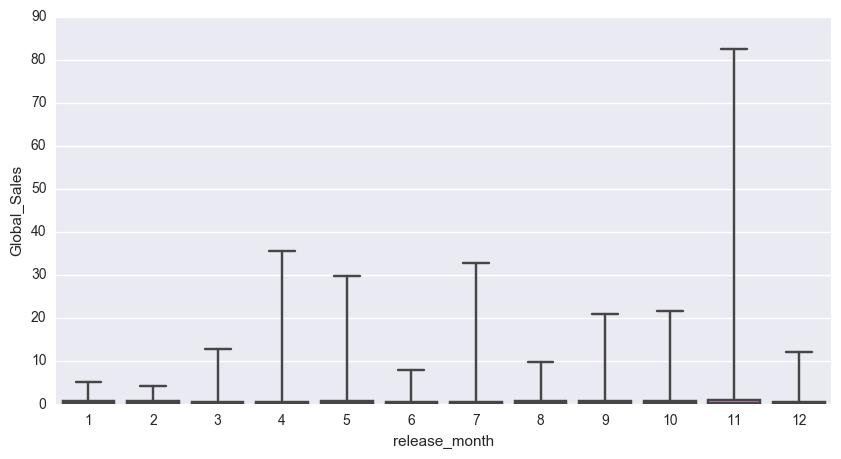

In [9]:
rans = df.sample(n=100)

fig1, ax1 = plt.subplots(figsize=(10,5))

sns.boxplot(x='release_month', y='Global_Sales', data=df, whis=np.inf)


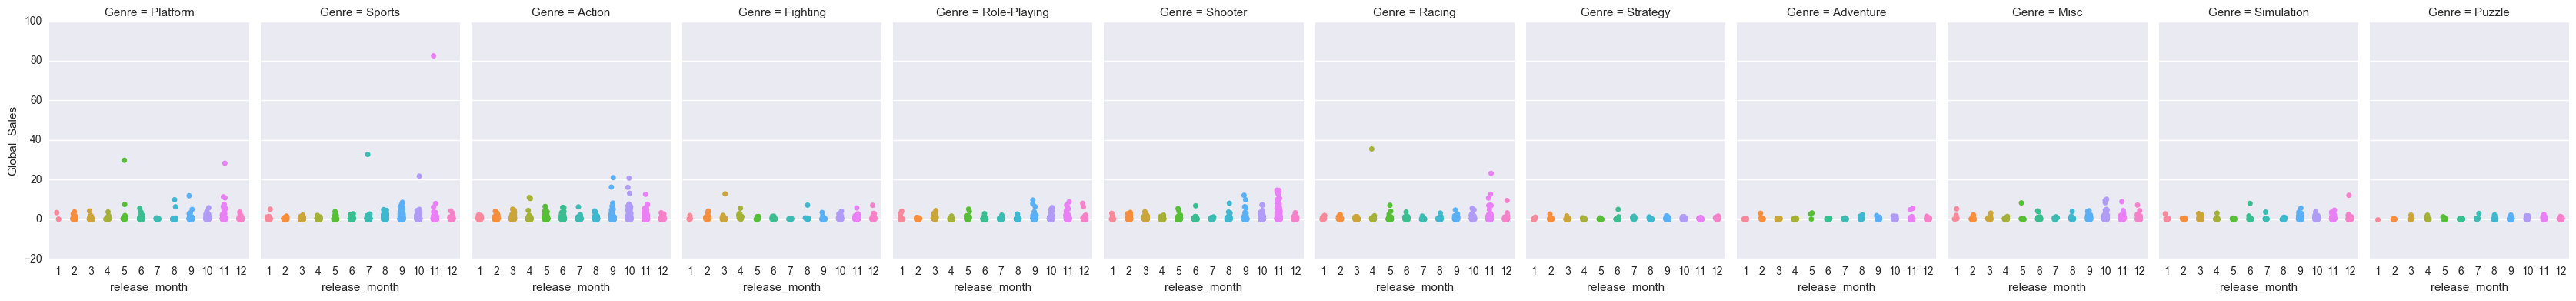

In [10]:
sns.factorplot(x='release_month', y='Global_Sales', data=df, col='Genre', kind='strip', jitter=True, size=4, aspect=0.7)

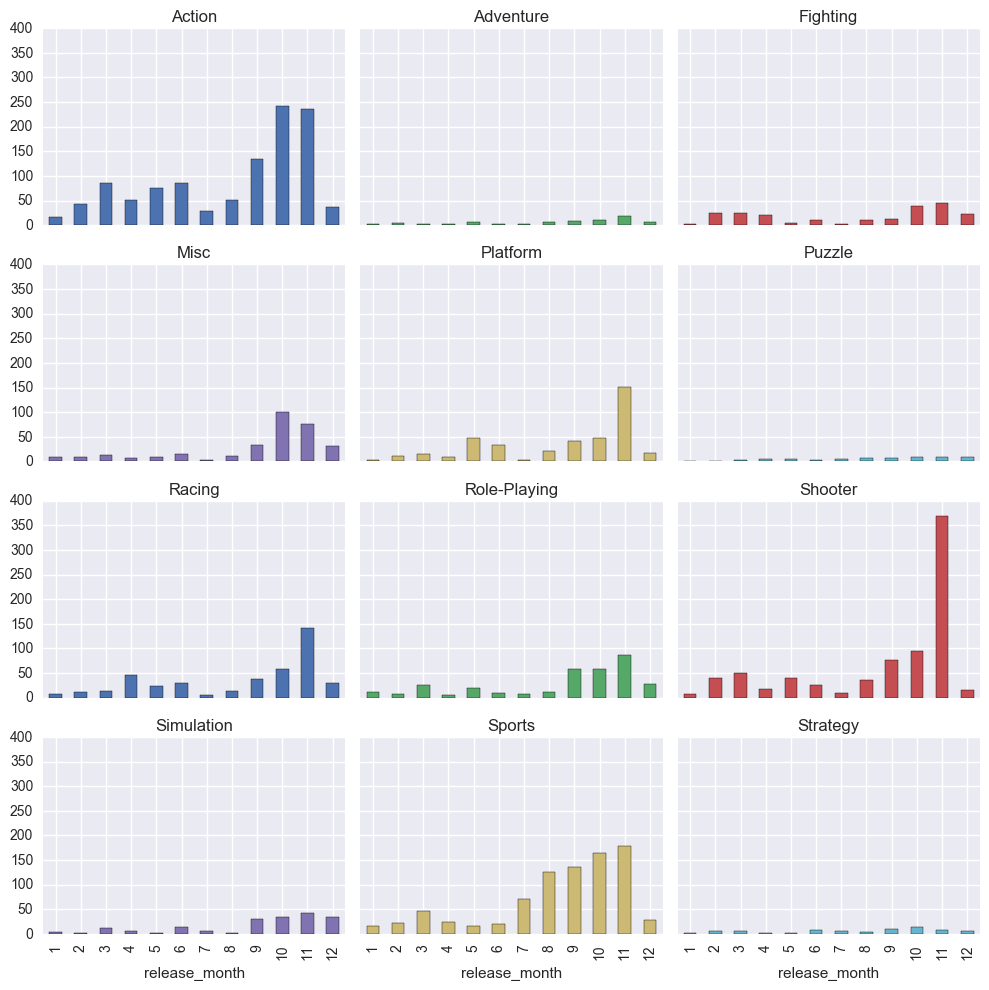

In [11]:
r = df[['Genre','release_month', 'Global_Sales']]
r = r.groupby(['Genre','release_month'])['Global_Sales'].sum()
r =r.unstack(0)

#setting index to int
r.index= r.index.astype(int)
r = r.sort_index()


r = r.plot(kind='bar',subplots=True, layout=(4,3), figsize=(10,10), sharex=True,legend=False, sharey=True)
plt.tight_layout()
plt.show()

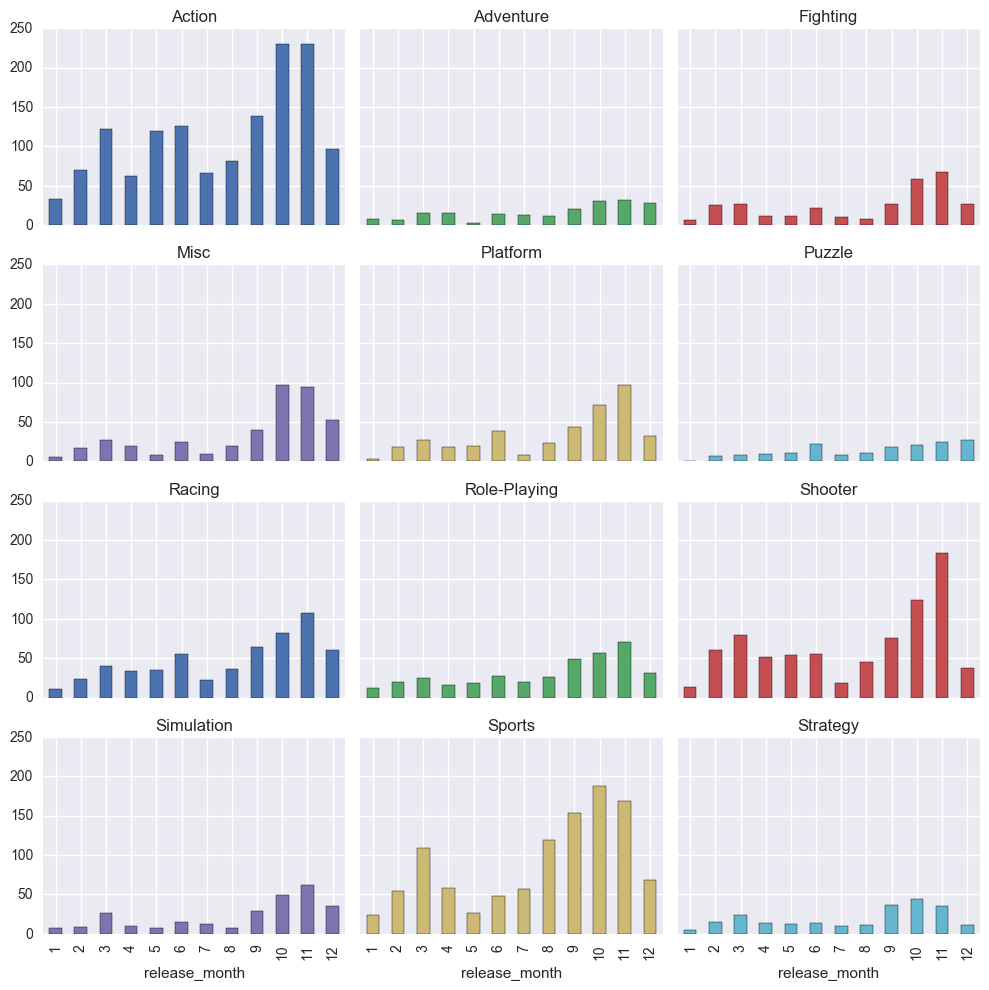

In [12]:
r = df[['Genre','release_month']]
r = r.groupby('Genre')['release_month'].value_counts()
r =r.unstack(0)

#setting index to int
r.index= r.index.astype(int)
r = r.sort_index()


#fig, ax1 = subplots()
r = r.plot(kind='bar',subplots=True, layout=(4,3), figsize=(10,10), sharex=True,legend=False, sharey=True)
plt.tight_layout()
plt.show()

(0, 3)

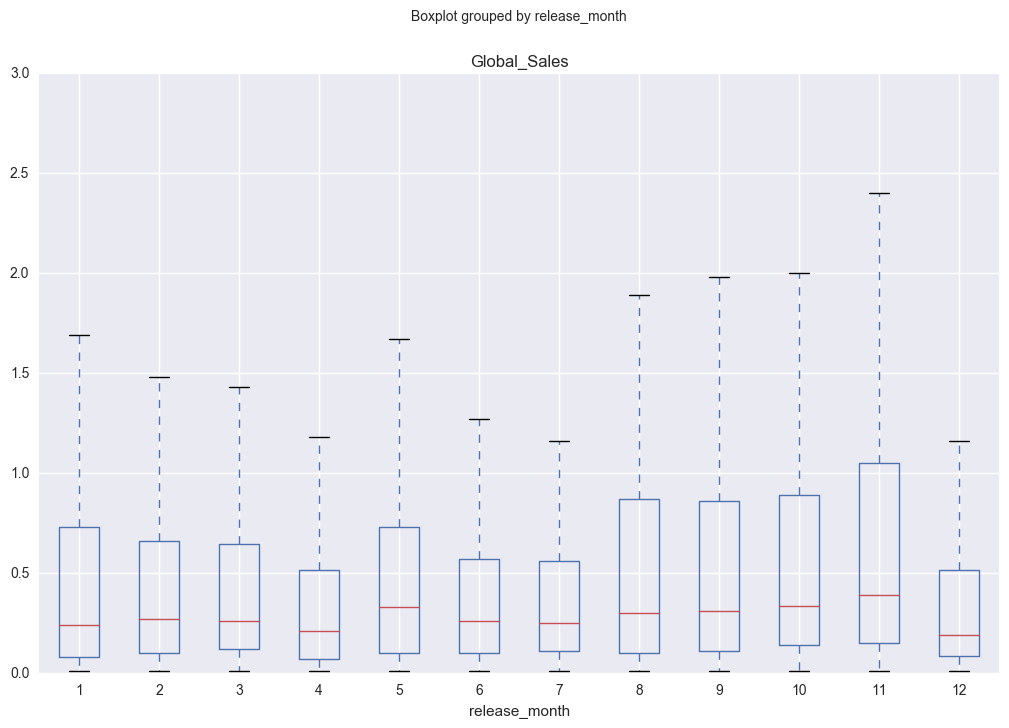

In [13]:
df.boxplot('Global_Sales', by='release_month', figsize=(12,8)) # shows median and outliers
plt.ylim((0,3))

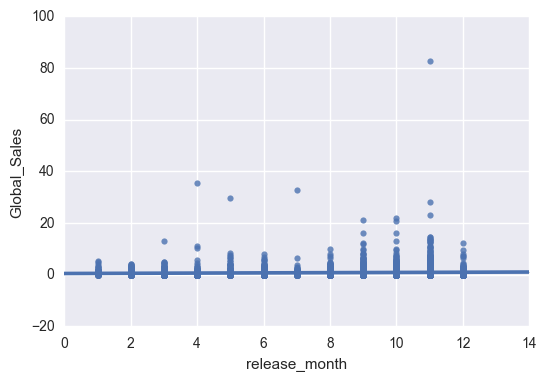

In [14]:
month_sales = df[['release_month','Global_Sales']]
sns.regplot(x='release_month', y='Global_Sales', data=month_sales)

In [15]:
#d_data = {groups:month_sales['Global_Sales'][month_sales.release_month==groups] for group in groups}

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Global_Sales ~ C(release_month)', data=month_sales).fit()
anova = sm.stats.anova_lm(mod, typ=2)
print(anova)

                        sum_sq      df         F        PR(>F)
C(release_month)    297.969046    11.0  7.261476  1.910122e-12
Residual          22956.784684  6154.0       NaN           NaN


## November Sales over time. For all the video games released in November over time.

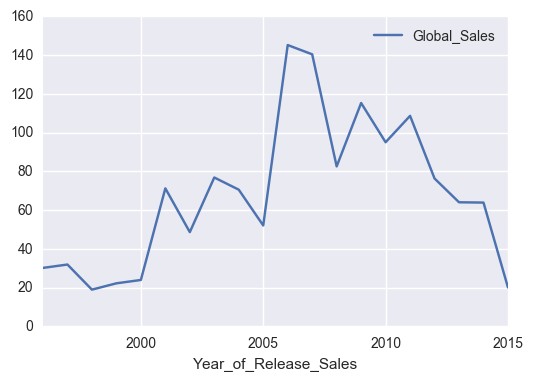

In [17]:
nov = df[df.release_month==11]
nov = nov[['Year_of_Release_Sales','Global_Sales']]
nov['Year_of_Release_Sales'] = nov['Year_of_Release_Sales'].astype(int)
sales_overtime = nov.set_index(keys='Year_of_Release_Sales').sort_index()
sales_overtime.index = pd.to_datetime(sales_overtime.index,format='%Y')
sales_overtime.resample('A').sum().plot()
#plt.ylim((0,500))


In [18]:
#fidning the number of releases (total of that year and see the percentage of thsoe released in number)

In [19]:
months = df.release_month.value_counts().sort_index()
total = months.sum()

(-1.0007618812905559, 1.0, -1.0180328758478558, 1.0012976843437351)

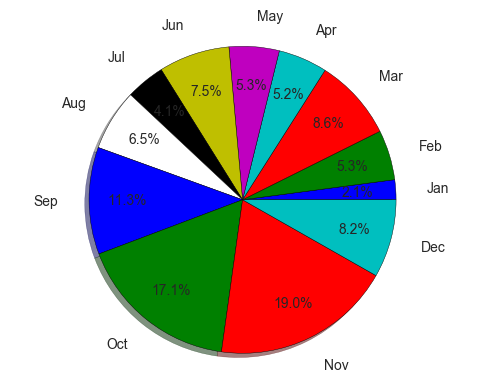

In [20]:
monthly_releases = months / total * 100
labels = ['Jan', 'Feb','Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct','Nov','Dec']
#plt.pie(sizes, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.pie(monthly_releases, labels=labels, autopct='%1.1f%%', shadow=True, labeldistance=1.2, pctdistance=0.75)
plt.axis('equal')

In [21]:
#We know that November is a popular month, but which day of November is the best?

#th 14thm historically had the most releases. 

days = df[(df.release_month==11)]
days = days.release_day.value_counts().sort_index()
day_releases = days / days.sum() * 100
day_releases.sort_values(ascending=False).head(3)

14    6.239316
11    6.153846
3     5.213675
Name: release_day, dtype: float64

## Which day of the week is the best?

Tuesday has the most releases, followed by Monday and Friday.
So if your game is released on November 14th that happens to fall on a Tuesday, then you're gold! 

In [22]:
import datetime as dt
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date'].dt.dayofweek.value_counts().sort_values(ascending=False)

1    1736
0    1179
4    1167
2    1029
3     962
6      50
5      43
Name: Release_Date, dtype: int64

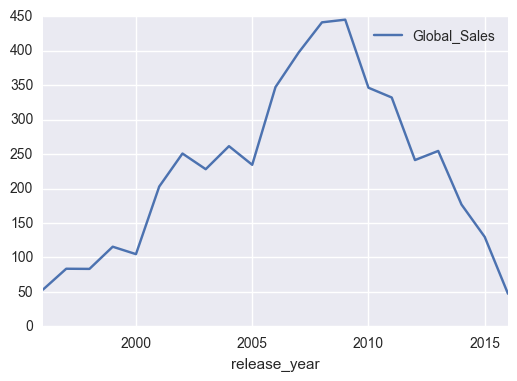

In [23]:
#how video games are doing over time 

gs = df[['release_year','Global_Sales']]
sales_overtime = gs.set_index(keys='release_year').sort_index()
sales_overtime.index = pd.to_datetime(sales_overtime.index, format='%Y')
sales_overtime.resample('A').sum().plot()
plt.show()

## Did Global Sales for Videogames peak at 2008 and went down hill after 2009? Is 2008 really the golden year for global sales

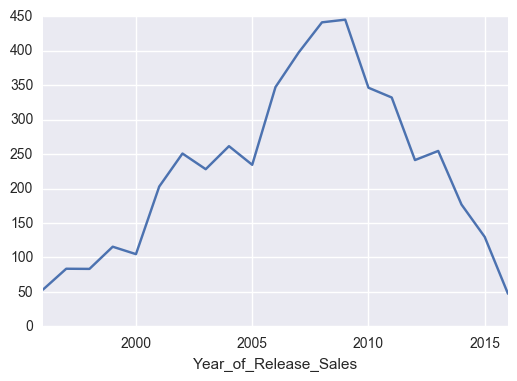

In [24]:
df.groupby(['Year_of_Release_Sales'])['Global_Sales'].sum().plot()

In [25]:
# 2008 has the most number of releases, what is the critic score distribution for 2008?

## Are the Number of Releases per year correlated with the global sales that year?

$H_{o}$ : There is no association between the number of game releases and global sales.

$H_{A}$ : There is an association between the number of game releases and global sales. 


Do the number of game releases really correlate with the total amount of global sales made that respected year. But do more games released means more money? In the figure shown below, where the number of releases and global sales are plotted over time, you can see that there is a steady strend until 2011, where it appears that the number of releases decreased significantly. Although the number of releases decreased, there is still money made from a fewer number of releases. The number of games released that particular year is used as the explanatory variable and the total global sales of that respected year is the response variable. An $\alpha$ of 0.05 is used as the significance level. A p-value of 5.9e-08 is found to be less than the significance level such that we reject the null hypothesis where there is no association between the two variables. The pearson r value of 0.89 indicates that there is a strong and positive correlation between the number of games released and the global sales. An adjusted R value of 0.784 shows that 78.4% of the number of games released per year can be used to explain the total global sales of that year. If the number of games released per year increased then the global sales will be increased at 0.5879 million dollars for that respected year, at 95% CI, the global sales can increase as low as 0.444 for one unit of games released and as high as 0.731 million dollars per year.  

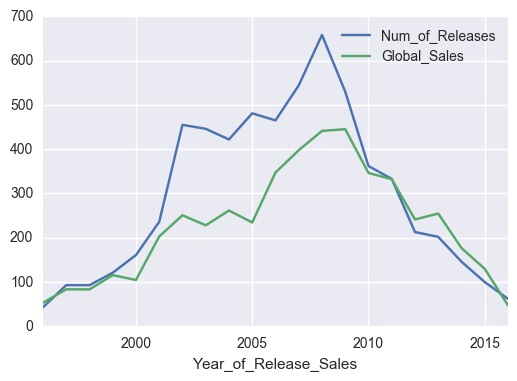

In [26]:
#are the number of releases correlated with sales?

release_count = df.groupby(['Year_of_Release_Sales'])['Global_Sales'].count().sort_values(ascending=False)
glob_sales = df.groupby(['Year_of_Release_Sales'])['Global_Sales'].sum()
real_sales = pd.concat([release_count, glob_sales],axis=1, keys=['Num_of_Releases','Global_Sales'])
real_sales.index = real_sales.index.astype(int)
real_sales.plot()

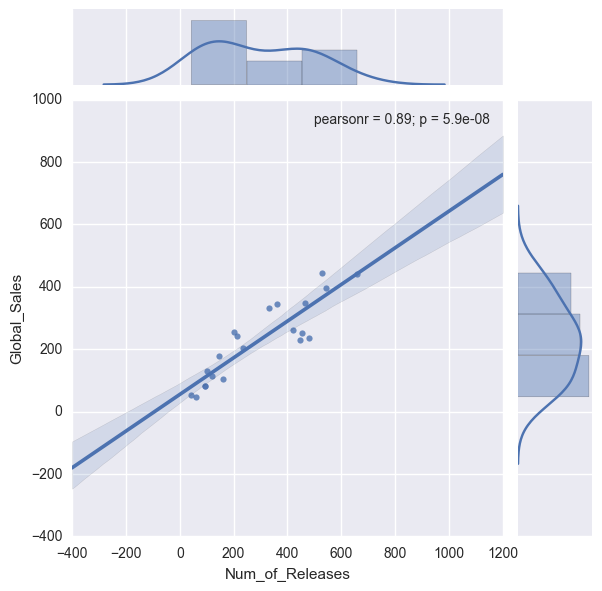

In [27]:
sns.jointplot(x='Num_of_Releases', y='Global_Sales', data=real_sales, kind='reg')

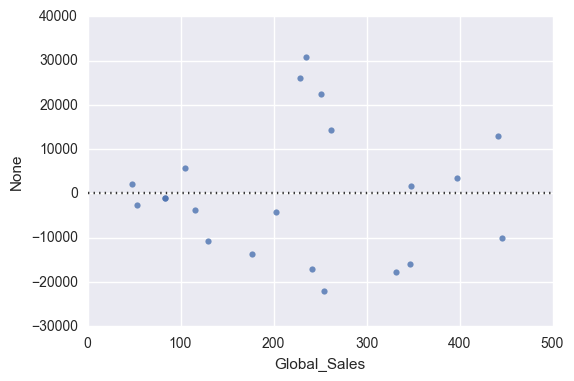

In [28]:
#real_sales
residual_sales = resi_calc(real_sales.Num_of_Releases, real_sales.Global_Sales)
sns.residplot(x=real_sales.Global_Sales, y=residual_sales)


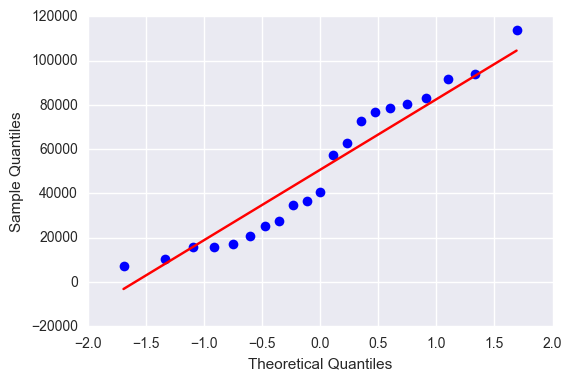

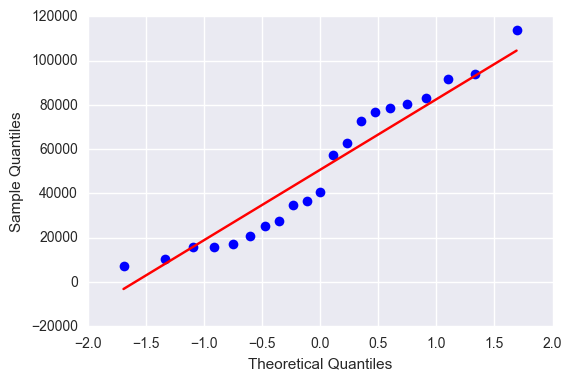

In [29]:
sm.qqplot(residual_sales, line='s')

In [30]:
mod = ols(formula='Global_Sales ~ Num_of_Releases', data=real_sales)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     73.51
Date:                Wed, 20 Dec 2017   Prob (F-statistic):           5.90e-08
Time:                        15:43:05   Log-Likelihood:                -113.93
No. Observations:                  21   AIC:                             231.9
Df Residuals:                      19   BIC:                             234.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          54.9076     23.756     

## is there a correlation between the number of releases and the critic score

## number of releases correlated with the critic rating. 


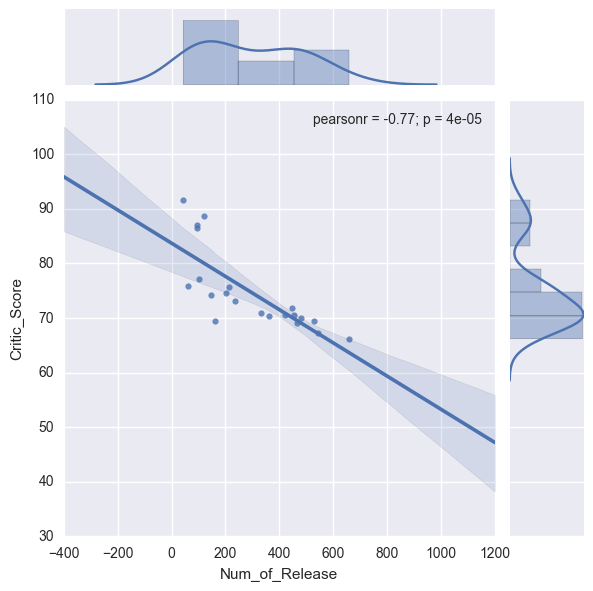

In [31]:
#stats.linregress(x=bb['Num of Release'], y=bb['Critic Score'] )
name = df.groupby(['Year_of_Release_Sales'])['Name'].size()
score_mean = df.groupby(['Year_of_Release_Sales'])['Critic_Score'].mean()

bb = pd.concat([name,score_mean], axis=1, keys=['Num_of_Release','Critic_Score'])
sns.jointplot(x='Num_of_Release', y='Critic_Score', data=bb, kind='reg')

In [32]:
mod_sc = ols(formula='Critic_Score ~ Num_of_Release', data=bb)
print((mod_sc.fit()).summary())

                            OLS Regression Results                            
Dep. Variable:           Critic_Score   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     28.23
Date:                Wed, 20 Dec 2017   Prob (F-statistic):           3.97e-05
Time:                        15:43:06   Log-Likelihood:                -61.785
No. Observations:                  21   AIC:                             127.6
Df Residuals:                      19   BIC:                             129.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         83.7061      1.983     42.

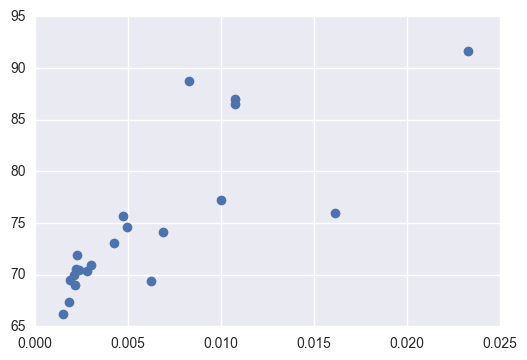

In [33]:
plt.plot(1/name, score_mean, marker='o',linestyle='none')

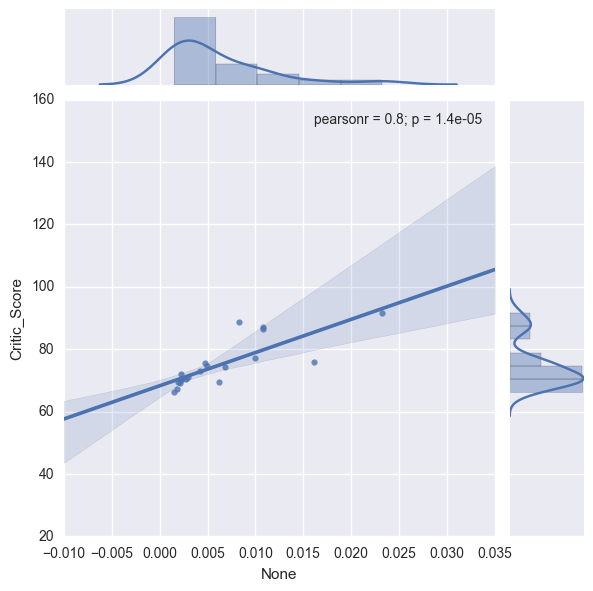

In [34]:
logname = np.log(name)

sns.jointplot(1/name, score_mean, kind='reg')

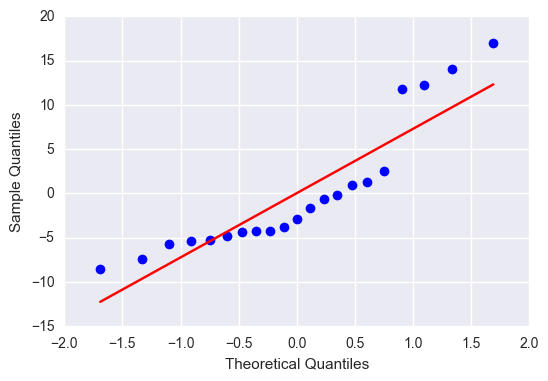

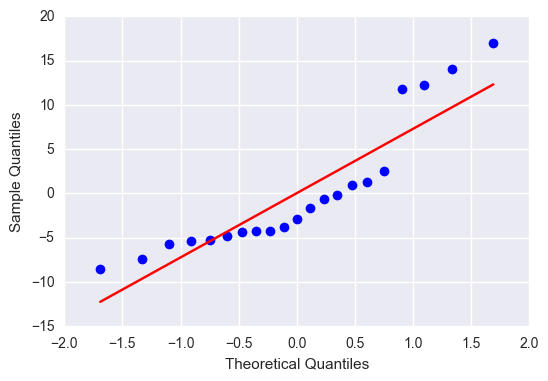

In [35]:
res = resi_calc(1/name, score_mean)
sm.qqplot(res, line='s')

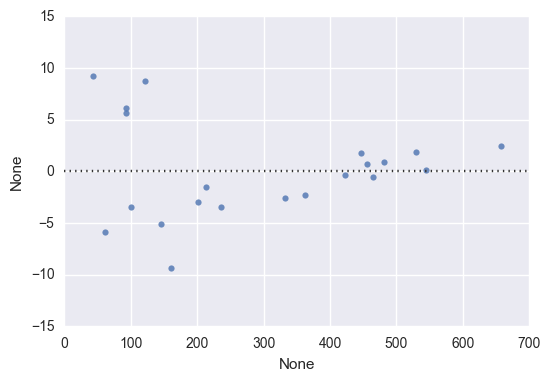

In [36]:
res_score = resi_calc(name, score_mean)
sns.residplot(x=name, y=res_score)

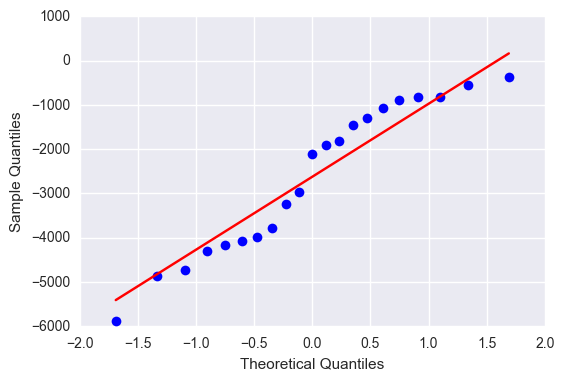

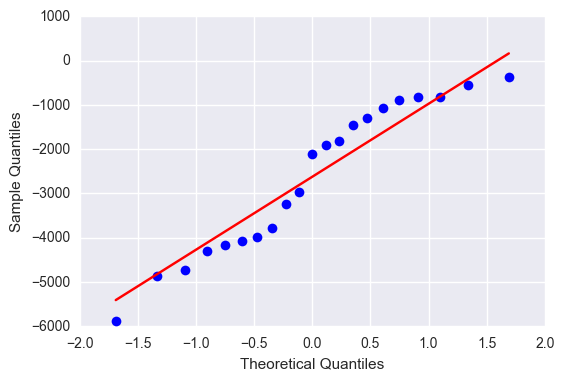

In [37]:
sm.qqplot(res_score, line='s')

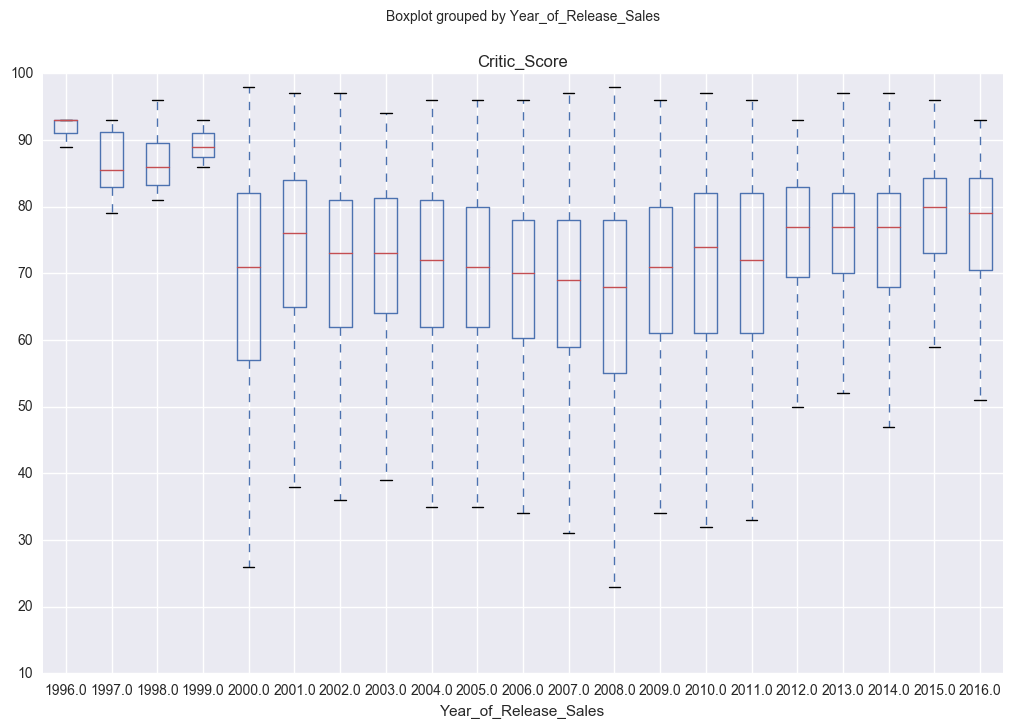

In [38]:
df.boxplot('Critic_Score', by='Year_of_Release_Sales', figsize=(12,8)) # shows median and outliers


## Is there an Relationship between critic scores and global sales?



In order to investigate if there is an correlation between critic score and global sales, a linear regression model is used where the critic score is the explanatory variable and global sales is the response variable.

$H_{o}$ : There is no association between Critic Score and Global Sales

$H_{A}$ : There is an association between Critic Score and Global Sales


With a p-value of 1.7e-75< 0.05, there is a statistical significance in the correlation coefficient r. An r value of 0.25 indicates that there is a small positive correlation between the critic score and global sales. an R^2 value of 0.064 indicates that only 6.4% global sale values can be explained by the critic score. A slope of 0.037 was calculated and at 95% CI can be as low as 0.034 and as high as 0.042. As the critic score increases by 1 point, the number of global sales for that respected video game increases by 0.037 million dollars. In other words, for every critic score that increases by one point, the dollar amount for global sales increases by $37,000. 


But we do wonder if this differs by region and if we remove outliers

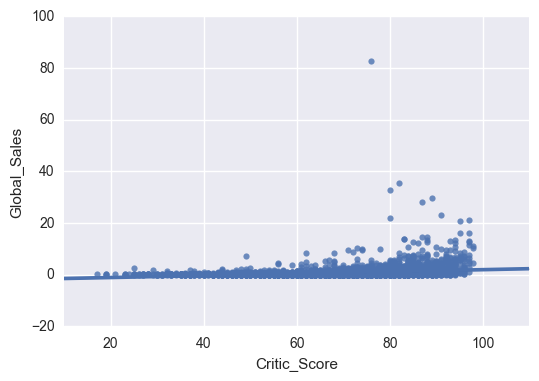

In [39]:
sns.regplot(x='Critic_Score',y='Global_Sales', data=df)

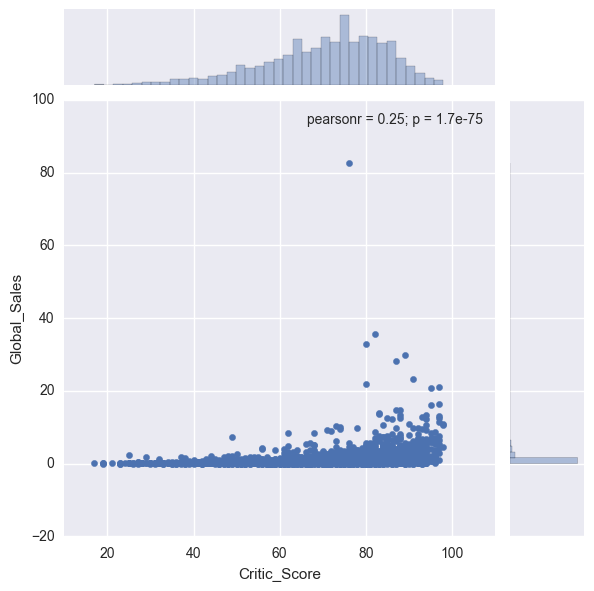

In [40]:
scores = df[['Critic_Score','Global_Sales']].dropna()

sns.jointplot(x='Critic_Score',y='Global_Sales', data=scores)

In [41]:
reg_model(scores.Critic_Score, scores.Global_Sales)

poly1d([ 0.03793415, -1.86128559])

In [42]:
r,p = stats.pearsonr(scores.Critic_Score, scores.Global_Sales)
r,p

(0.25314846121429713, 1.7365281826496276e-75)

In [43]:
predicted = scores.Critic_Score * 0.03793415 + (-1.86128559)

In [44]:
slope = (scores.Global_Sales.std() / scores.Critic_Score.std() ) * r  *(-np.mean(scores.Critic_Score))
slope

-2.6741567258382224

In [45]:
intercept = np.mean(scores.Global_Sales)
intercept

0.8128711320015655

In [46]:
#y = fit_fn[0] * scores.Critic_Score + fit_fn[1]
y_hat = slope * scores.Critic_Score + intercept

residuals = (scores.Global_Sales - predicted)

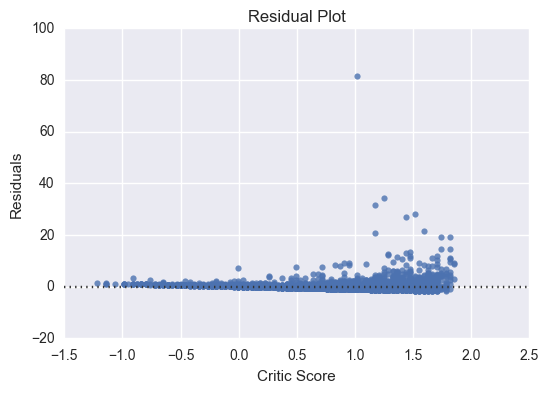

In [47]:
sns.residplot(x=predicted, y=residuals)
plt.ylabel('Residuals')
plt.xlabel('Critic Score')
plt.title('Residual Plot')

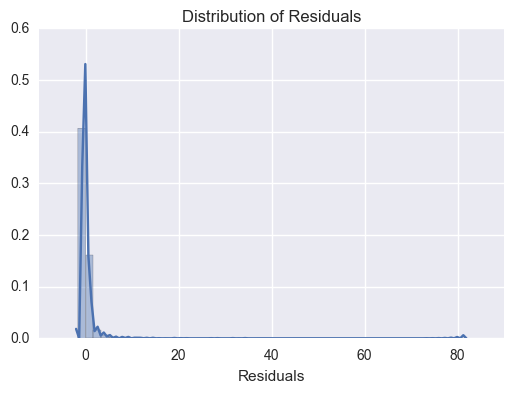

In [48]:
sns.distplot(residuals, norm_hist=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

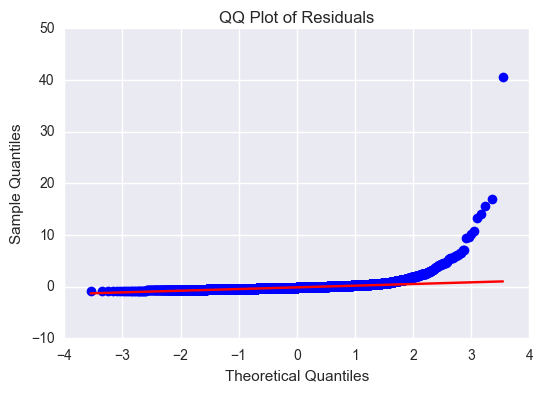

In [49]:
sm.qqplot(residuals, fit=True, line='q')
plt.title('QQ Plot of Residuals')

In [50]:
mod = ols(formula='Global_Sales ~ Critic_Score', data=scores)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     349.5
Date:                Wed, 20 Dec 2017   Prob (F-statistic):           1.74e-75
Time:                        15:43:13   Log-Likelihood:                -10818.
No. Observations:                5106   AIC:                         2.164e+04
Df Residuals:                    5104   BIC:                         2.165e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -1.8613      0.146    -12.766   

In [51]:
r_abs  = 2/ np.sqrt(len(scores))
r_abs

0.027989142318762001

## Without Outliers

In [134]:
critic = df[['Critic_Score', 'Global_Sales']]
crit_score = critic [np.abs(critic.Global_Sales - np.mean(critic.Global_Sales)) <=(3*critic.Global_Sales.std())]

len(crit_score)

6089

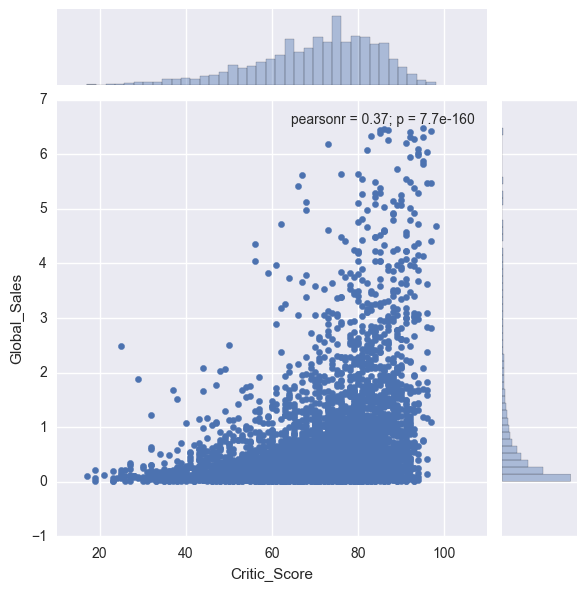

In [53]:
sns.jointplot(x='Critic_Score', y='Global_Sales', data=crit_score)

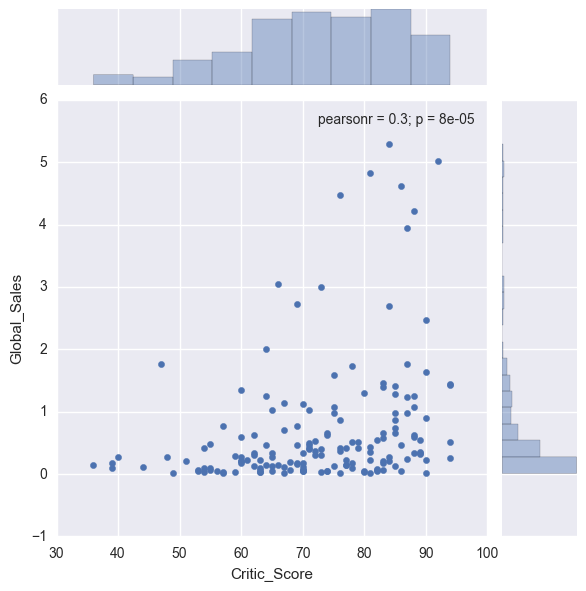

In [54]:
rand = crit_score.sample(n=200)

sns.jointplot(x='Critic_Score', y='Global_Sales', data=rand)

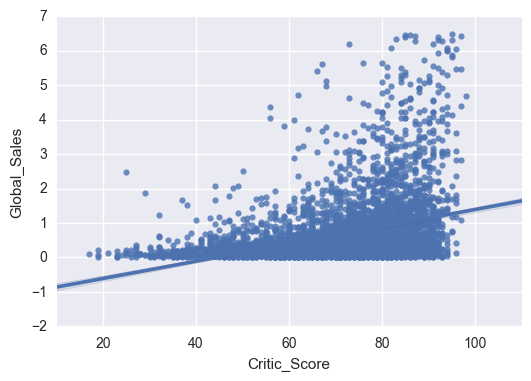

In [55]:
sns.regplot(x='Critic_Score', y='Global_Sales', data=crit_score)

In [135]:
mod = ols(formula='Global_Sales ~ Critic_Score', data=crit_score)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     780.7
Date:                Wed, 20 Dec 2017   Prob (F-statistic):          7.66e-160
Time:                        16:35:11   Log-Likelihood:                -6484.0
No. Observations:                5036   AIC:                         1.297e+04
Df Residuals:                    5034   BIC:                         1.299e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -1.1102      0.064    -17.315   

## Outliers - Successful Games

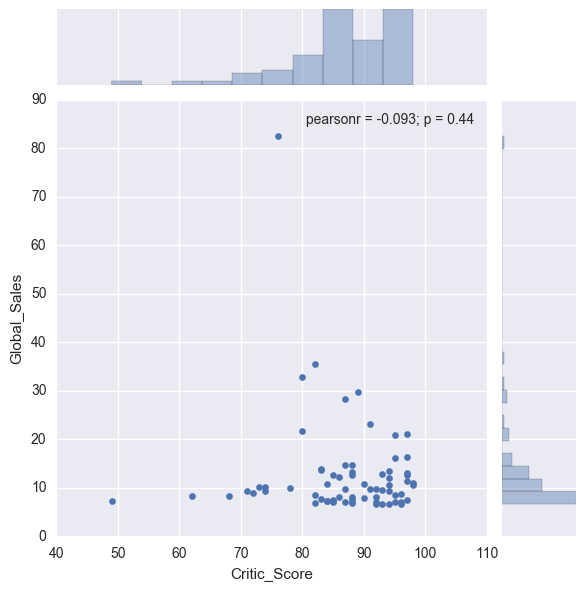

In [58]:
#outliers

#critic scores with outliers
crit_out = critic [np.abs(critic.Global_Sales - np.mean(critic.Global_Sales)) >(3*critic.Global_Sales.std())]

crit_out = crit_out.dropna()

sns.jointplot(x='Critic_Score', y='Global_Sales', data=crit_out)

In [ ]:
mod = ols(formula='Global_Sales ~ Critic_Score', data=crit_out)
res = mod.fit()
print(res.summary())

In [ ]:
# Take 2008, Monthly sales since this is the peak year for video games
# for each respective genre, maybe find their peak year? and analyze the monthly global sale mean within that year

In [ ]:
df.groupby('Year_of_Release_Sales')['Global_Sales'].sum().plot()

## What is considered a good critic score in terms of sales?

Metacritic scores affect how developers get bonuses and how well their game will do. 

-How good have your games been

-Average score for developer 

-If you get above 90 metascore. Is this true that you will do well?

-Is a score of 90 really the score that developers should be aiming for when doing well for a video game


Metacritic scores have been widely criticized for how much they influence how well a video game will do. Often, publishers will used a developer's previous metacritic score as a measure for receiving funding or not. Developers will often pitch to publishers favorable components of their video game in order to generate the highest review and potential funding. According to the metacritic site, any score above 90 is universally acclaimed. But is 90 truly the threshold for what developers should be aiming for. In order to investigate this "threshold" for success, the dataset consisting of Critic Scores and Global Sales was divided into two subgroups using the outliers of global sales as a metric: dataset without outliers and a dataset with just outliers. Global Sales data that is more than 3 standard deviations away are considered an outlier and will be considered widely successful. 


The dataset without global sales outliers was used to investigate what the average critic score is for a typical game release that isn't considered extremely successful. According to Metacritic, a score in a range of 54-74 is considered average and a score in a range of 75-89 is considered genereally favorable. A typical game has a 70.2889 metacritic score, at 95% CI the average score can be as low as 69.9002 and as high as 70.6777. 


Developers often aim to have a video game that will have a 90 metacritic score or above in order to achieve success and funding their game. Any game with a score above 90 is universally acclaimed and 75-89 is considered generally favorable. In order to test whether 90 is truly an threshold for success, a One-Sample T-test is used to determine the validity of this high achieving score and what is a more realistic score that developers should strive for. The latter dataset with the outliers is used where data containing global sales and its respected critic score with more than 3 standard deviations away from the mean is used and this is metric used as a measure for success. Under the null hypothesis, a successful metacritic score is 90 and the alernative is that the successful metacritic score is not 90. 

$H_{o}$ : $\bar{x}$ = 90

$H_{A}$ : $\bar{x}$ $\ne$ 90


t= -2.811

p-value = 0.0065



With a p-value from the t-test being less than 0.05, there is reason to reject the null hypothesis such that a successful metacritic score is not 90 and the observed from the data is actually -2.811 below 90. A sample mean of 86.7031 was calculated with a 95 % CI range of 84.377 and 89.028. This means that developers shouldn't stress so hard in achieving a metacritic of 90 or above when the average metacritic score of widely successful games (by their sales) is 86.7031. And is still considered successful with a score as low as 84 and as high as 89. This just goes to show that the metacritic score range is more skewked than what they actually are. 



source: https://web.archive.org/web/20150928225241/http://www.metacritic.com/about-metascores

https://kotaku.com/metacritic-matters-how-review-scores-hurt-video-games-472462218

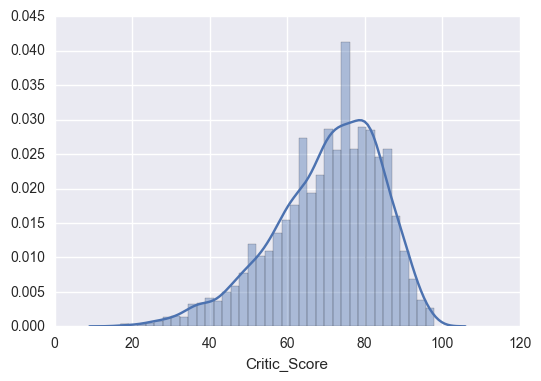

In [59]:
critic_score = df['Critic_Score'].dropna()
sns.distplot(critic_score)

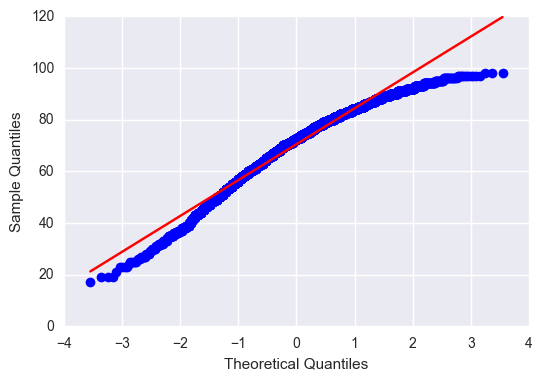

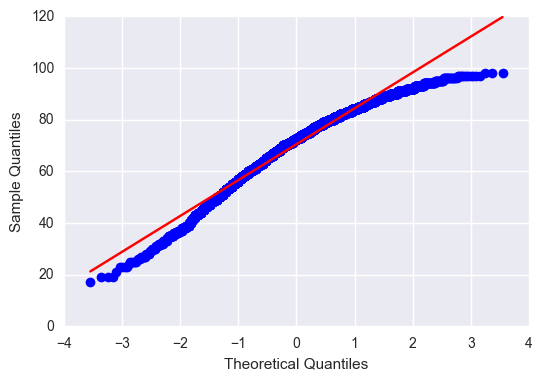

In [60]:
sm.qqplot(critic_score, line='s')

In [61]:
critic = df[['Critic_Score', 'Global_Sales']]

In [64]:
def conf_int (data):
    alpha=0.05
    ntails = 2
    dof = len(data)-1
    mean = np.mean(data)
    SEM = np.std(data)/ np.sqrt(len(data))
    
    tcrit = abs(stats.t.ppf(alpha/ntails, dof))
    
    #95 CI
    low_tail = mean - tcrit * SEM
    high_tail = mean + tcrit * SEM
    return low_tail, high_tail

## Global Sales and Critical Scores without NaNs and removed the outliers

In [65]:
#Global Sales and Critical Scores without NaNs and removed the outliers
crit_score = critic [np.abs(critic.Global_Sales - np.mean(critic.Global_Sales)) <=(3*critic.Global_Sales.std())]
crit_score.Critic_Score.mean()

70.26449563145353

In [66]:
conf_int(crit_score.Critic_Score)

(69.9177491649491, 70.611242097957955)

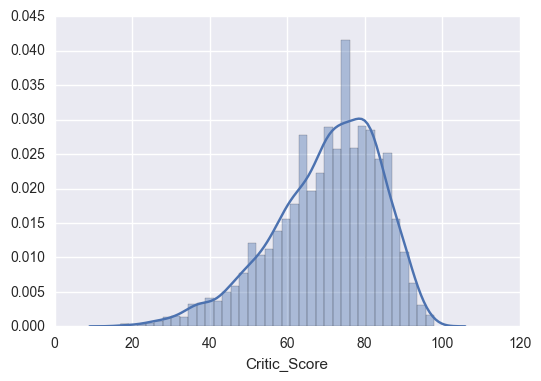

In [67]:
sns.distplot(crit_score.Critic_Score.dropna())

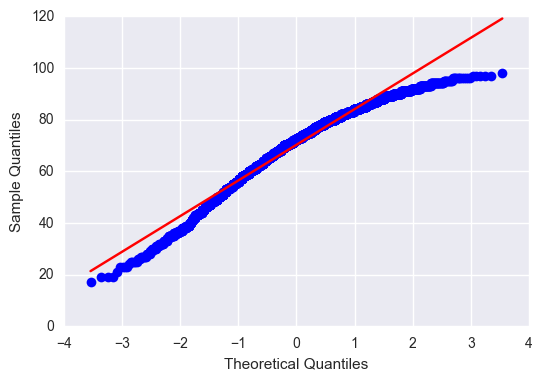

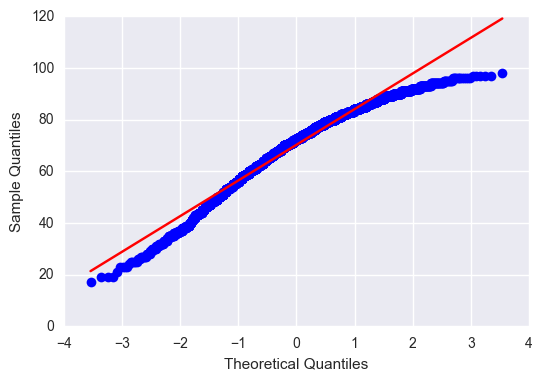

In [68]:
sm.qqplot(crit_score.Critic_Score.dropna(), line='s')

## With Outliers

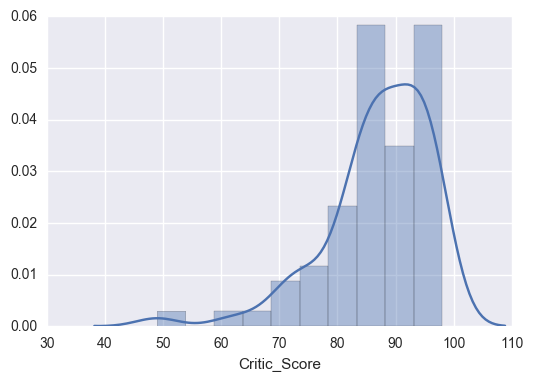

In [69]:
#outliers

#critic scores with outliers
crit_out = critic [np.abs(critic.Global_Sales - np.mean(critic.Global_Sales)) >(3*critic.Global_Sales.std())]

crit_out = crit_out.dropna()

sns.distplot(crit_out.Critic_Score)

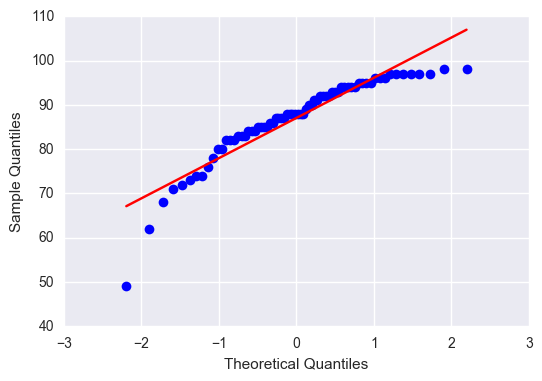

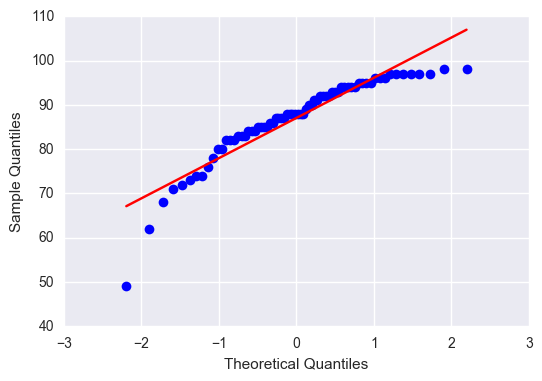

In [70]:
sm.qqplot(crit_out.Critic_Score, line='s')

In [71]:
stats.ttest_1samp(crit_out.Critic_Score, 90)

Ttest_1sampResult(statistic=-2.6930147062304246, pvalue=0.0088810753873270303)

In [72]:
np.percentile(crit_out.Critic_Score, [2.5,97.5]) #any score outside of this is considered not good. 

array([ 66.35 ,  97.275])

In [73]:
conf_int(crit_out.Critic_Score)



(84.892745486055162, 89.221540228230566)

In [74]:
samp_mean = np.mean(crit_out.Critic_Score)
samp_mean

87.05714285714286

In [75]:
df.Global_Sales.max()

82.530000000000001

In [76]:
df[(df.Global_Sales==82.53)]

,score_phrase,Name,url,Platform,score,editors_choice,release_year,release_month,release_day,Release_Date,...,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,_merge
3749,Good,Wii Sports,/games/wii-sports/wii-826987,Wii,7.5,N,2006,11,13,2006-11-13,...,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,both


## Is there a critic score difference between platforms?

## Console Wars: Xbox 360 vs. PlayStation 3


In the Gaming Community, there has been a long debate between which console is better: Xbox or Playstation. But this heated debate did not start until the releases of the Xbox 360 and PlayStation 3 that truly made each respected console as rivals. Personally, as a Xbox fan, I would like to assume that Xbox 360 is more favored than the PlayStation 3. A Two Sample T-test is used to test whether there is statistical significance in the difference in means between the two console's average critic score. 

$\bar{x}_{1}$ = Xbox 360 Critic Score

$\bar{x}_{2}$ = PlayStation 3 Critic Score

$H_{o}$ : $\bar{x}_{1}$ - $\bar{x}_{2}$  = 0 or $\bar{x}_{1}$ = $\bar{x}_{2}$

$H_{A}$ : $\bar{x}_{1}$ - $\bar{x}_{2}$ $>$ 0 or $\bar{x}_{1}$ $>$ $\bar{x}_{2}$


#### Conclusion:
To my surprise, the PlayStation 3's average critic score is higher than the Xbox 360. The average critic score for the PlayStation 3 is 72.486 (as low as 71.328 and as high as 73.644). In comparison to the Xbox 360's average critic score of 70.810 (69.681, 71.938), the PlayStation 3's average critic score is higher by 1.676. An t-statistic of -2.034 shows that the difference in means is -2 standard deviations away from what the null hypothesis expected, which in this case is 0. This just goes to show that the two platform's average critic score are not the same. With the pvalue 0.0421 being less than 0.05, there is evidence to reject the Null the Hypothesis and there is statistical significance between the average critic score. So sadly to conclude, the PlayStation 3 does outperform the Xbox 360 in Critic Ratings. 

In [77]:
xbox = df[(df.Platform=='Xbox 360')]['Critic_Score'].dropna()
ps3 = df[(df.Platform=='PlayStation 3')]['Critic_Score'].dropna()

In [104]:
ps3.std()

13.953561573962213

In [105]:
print('Xbox 360 mean: {}'.format(xbox.mean()))
print('ps3 mean: {}'.format(ps3.mean()))

Xbox 360 mean: 70.8103975535
ps3 mean: 72.4865831843


In [99]:
#xbox
conf_int(xbox)

(69.681984884036623, 71.93881022299702)

In [100]:
#ps3
conf_int(ps3)

(71.328388741878683, 73.644777626636511)

In [101]:
stats.ttest_ind(xbox, ps3, equal_var=False)

Ttest_indResult(statistic=-2.034097128706716, pvalue=0.042161759812732971)

In [102]:
stats.mannwhitneyu(xbox,ps3)

MannwhitneyuResult(statistic=171031.0, pvalue=0.026520759047016257)

In [103]:
xbox.mean() - ps3.mean()

-1.6761856307407754

In [85]:
def conf_inf_diff (data1, data2, dof): 
    SE = np.sqrt((((data1.std())**2)/ len(data1)) + (((data2.std())**2)/len(data2)))

    alpha=0.05
    ntails= 2
    tcrit= abs(stats.t.ppf(alpha/ntails,dof))

    diff = data1.mean() - data2.mean() 
    
    return diff - tcrit * SE, diff + tcrit * SE

In [86]:
conf_inf_diff(xbox, ps3,558 )

(-3.2947930935087166, -0.057578167972833993)

In [87]:
#XBOX VS. PLAYSTATION

# will use 2008 and 2009 since this is the peak performance years for videogames. 

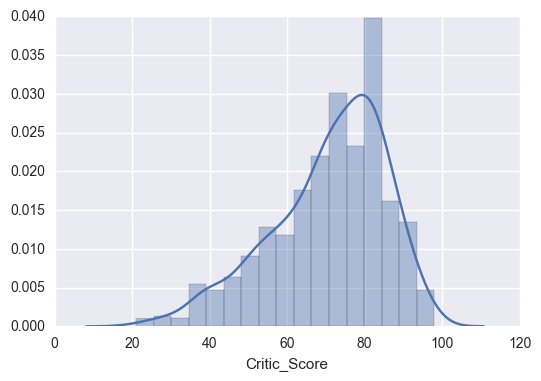

In [88]:
sns.distplot(xbox, norm_hist=True)

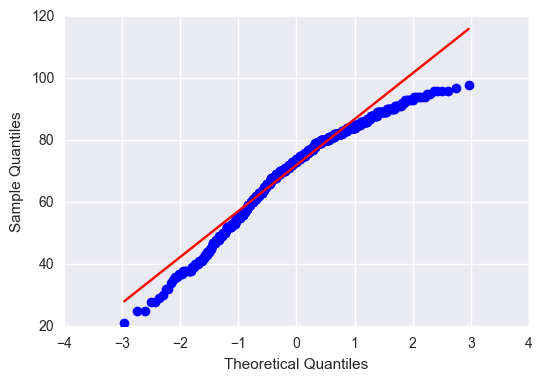

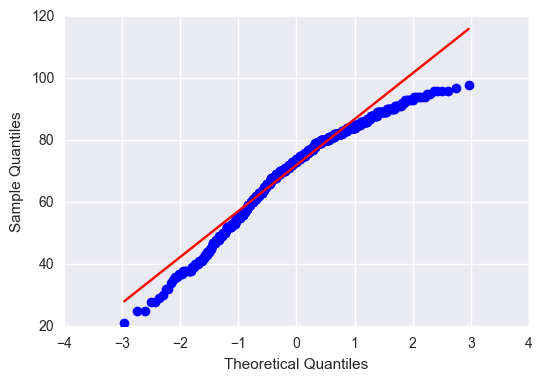

In [89]:
sm.qqplot(xbox, line='q')

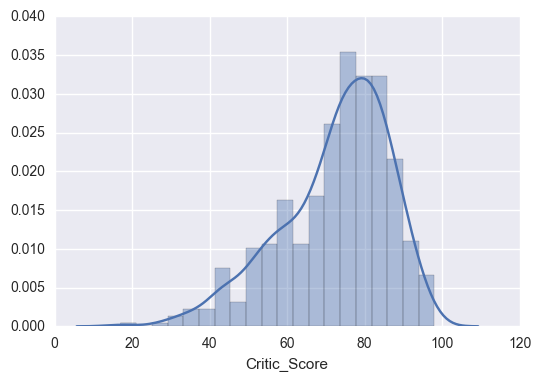

In [90]:
sns.distplot(ps3, norm_hist=True)

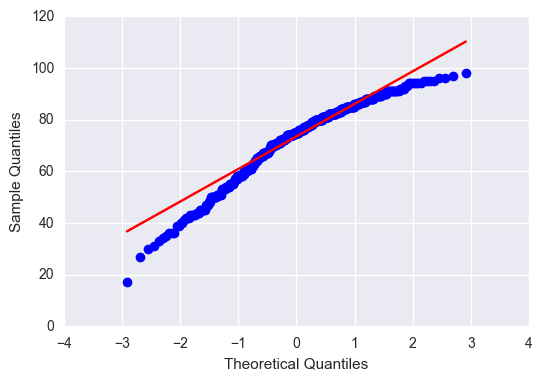

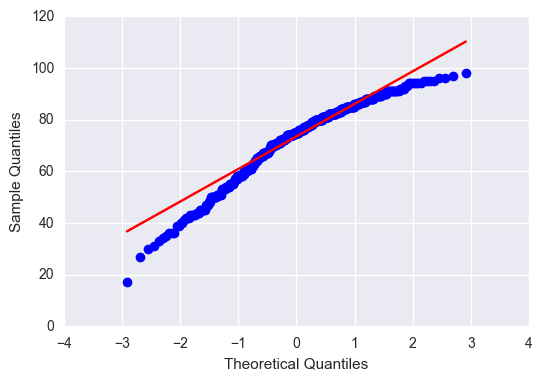

In [93]:
sm.qqplot(ps3, line='q')

In [94]:
#can I take the total for each year then average?

In [95]:
#which genres have more editor's choice?

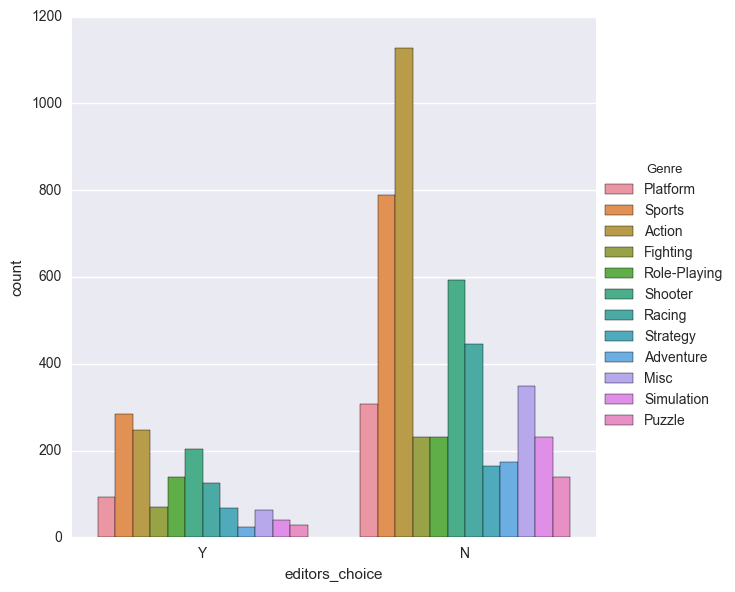

In [96]:
sns.factorplot(x='editors_choice', hue='Genre', data=df, kind='count', size=6)

In [106]:
#average critic score across xbox and playstation platforms in respect to each genre.

console = df[(df.Platform=='Xbox 360') | (df.Platform=='PlayStation 3')]
pd.crosstab(index=[console.Platform, console.editors_choice], columns=console.Genre, values=console.Critic_Score, aggfunc=np.mean)

Genre                            Action  Adventure  Fighting       Misc  \
Platform      editors_choice                                              
PlayStation 3 N               65.792308  62.571429     70.00  68.842105   
              Y               86.425000  86.750000     81.10  85.545455   
Xbox 360      N               64.788732  57.250000     67.64  63.147059   
              Y               84.102564  85.500000     82.00  84.461538   

Genre                          Platform  Puzzle     Racing  Role-Playing  \
Platform      editors_choice                                               
PlayStation 3 N               64.888889    74.0  70.636364     67.277778   
              Y               85.571429     NaN  84.625000     85.277778   
Xbox 360      N               62.181818    53.0  68.064516     67.545455   
              Y               82.750000     NaN  86.636364     88.312500   

Genre                           Shooter  Simulation     Sports   Strategy  
Platform      editors_choice                                               
PlayStation 3 N               64.000000     64.7500  71.000000  73.000000  
              Y               87.241379     84.0000  84.800000  85.000000  
Xbox 360      N               62.697674     66.3125  69.527473  69.555556  
              Y               87.272727     74.0000  83.413793  81.200000

## Which genre is more favorable in editor's choice ?

Do editor's favor certain genres more so than others? And is there an association between the genre and the editor's choice. 

$H_{o}$ : There is no association between a genre and the editor's choice

$H_{A}$ : There is an association between a genre and the editor's choice

In [107]:
pd.crosstab(index=df.editors_choice, columns=df.Genre, margins=True)


Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,All
editors_choice,,,,,,,,,,,,,
N,1128,173,232,349,307,138,445,232,593,231,790,164,4782
Y,248,24,70,62,93,28,125,139,204,40,284,67,1384
All,1376,197,302,411,400,166,570,371,797,271,1074,231,6166


In [108]:
cont_table = pd.crosstab(index=df.editors_choice, columns=df.Genre)
cont_table

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
editors_choice,,,,,,,,,,,,
N,1128,173,232,349,307,138,445,232,593,231,790,164
Y,248,24,70,62,93,28,125,139,204,40,284,67


In [109]:
chi2, p, dof, ex = stats.chi2_contingency(cont_table)
chi2, p, dof

(120.85953200304908, 1.217488237505159e-20, 11)

In [110]:
#average critic score across all genres and whether it's an editor's choice or not 
edit_genre_score = pd.crosstab(index=df.editors_choice, columns=df.Genre, values=df.Critic_Score, aggfunc=np.mean)
edit_genre_score

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
editors_choice,,,,,,,,,,,,
N,63.876955,62.246154,64.846995,63.699187,65.081545,64.744444,64.560510,68.811927,65.934615,67.772727,68.924071,69.181159
Y,84.940928,84.400000,81.920635,83.480000,84.545455,81.192308,84.008772,86.137405,85.370558,82.189189,85.229323,83.935484


In [111]:
stats.chi2_contingency(edit_genre_score)

(0.51237784197898284,
 0.99999843696395252,
 11,
 array([[ 65.3959737 ,  64.44163698,  64.49501777,  64.67587107,
          65.75152869,  64.12990015,  65.28672899,  68.09035415,
          66.48897925,  65.89870329,  67.74059067,  67.28500464],
        [ 83.42190973,  82.20451687,  82.27261169,  82.50331592,
          83.87547092,  81.80685199,  83.28255249,  86.85897703,
          84.81619451,  84.06321317,  86.41280372,  85.83163865]]))

## Which platforms have the highest critic scores according to their respected genres 

In [112]:
plat_genre = pd.crosstab(index=df.Platform, columns=df.Genre, values=df.Critic_Score, aggfunc=np.mean)
plat_genre

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,NaN,NaN,NaN,NaN,89.000000,NaN,82.000000,91.500000,NaN,NaN,97.000000,NaN
Game Boy Advance,63.224490,77.000000,64.400000,68.384615,70.525000,74.214286,66.041667,74.928571,67.800000,69.333333,70.800000,80.600000
GameCube,68.369231,65.727273,71.058824,66.176471,65.138889,67.875000,67.741935,73.000000,70.970588,73.142857,78.350000,76.500000
Nintendo 3DS,65.192308,68.000000,64.250000,70.000000,71.222222,67.000000,65.500000,73.571429,81.000000,63.000000,59.000000,60.500000
Nintendo 64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nintendo DS,60.416667,59.666667,58.125000,63.888889,68.615385,68.666667,58.071429,69.594595,67.720000,63.545455,65.142857,67.538462
PC,76.031915,71.466667,74.000000,79.000000,76.666667,81.500000,77.900000,80.615385,76.814815,76.300000,81.583333,76.673913
PlayStation,64.266667,67.333333,72.777778,68.000000,77.600000,NaN,73.200000,84.307692,64.857143,84.000000,72.947368,66.500000
PlayStation 2,68.048649,62.148148,70.466667,64.473684,67.208333,69.166667,68.472222,73.320755,68.117647,71.973684,74.189189,70.473684


In [113]:
df.groupby('Platform')['Critic_Score'].mean().sort_values(ascending=False)

Platform
Dreamcast               90.200000
PC                      77.133758
Xbox One                76.035714
PlayStation 4           75.470588
Wii U                   74.080000
PlayStation Vita        73.264706
PlayStation             73.145631
PlayStation 3           72.486583
Xbox                    71.189944
GameCube                71.037037
Xbox 360                70.810398
PlayStation 2           69.738876
Game Boy Advance        68.786611
PlayStation Portable    67.813953
Nintendo 3DS            67.029851
Nintendo DS             64.681592
Wii                     64.159780
Nintendo 64                   NaN
Name: Critic_Score, dtype: float64

## How are the average critic scores across genres?

Using the F-Statistic/ANOVA to test if the average critic score across all the genres have statistical significance and to see which genre does the best in terms of the average critic score. 

If the following conditions are met then the ANOVA Test can be used to analyze the average critic score across all the platforms:
1. The sample is Random and the measurements are Independent
2. The groups are independent of each other.
3. The standard deviation among the groups are the same (The largest standard deviation is no more than 2 times the smallest)
4. Each group is Normally Distributed Or the Sample Size is at least 25 in each group.


$H_{o}$ : The average critic score across all genres are the same. 

$H_{A}$ : The average critic score across all genres are varied. 

Because a comparison between and within groups is being observed, the Bonferonni Correction is required for the significance level. $\alpha$/K will be used as the significance level where $\alpha$=0.00090. An F-statistic is used to quantify the variation betweeen groups to the variation within groups. An F-Statistic of 1.1226 was computed. The small F-statistic value shows that the variation between groups relative to the variation within groups is small. Since the p-value is 0.340 is larger than 0.00090, the null hypothesis is not rejected and conclude that the average critic score across the genres are the same and not statistically siginificant in this analysis. 

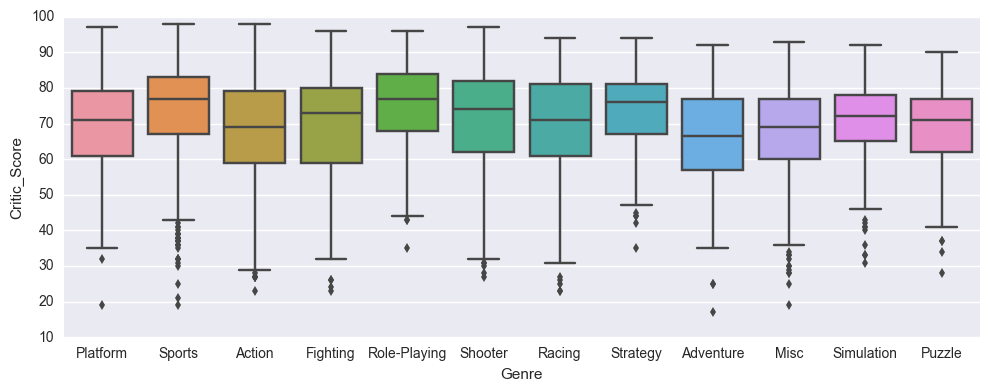

In [114]:

sns.factorplot(data=df, y='Critic_Score', x='Genre', kind='box', aspect=2.5, size=4)


In [115]:
df.groupby(['Genre'])['Critic_Score'].std().sort_values(ascending=False)

Genre
Adventure       14.886145
Fighting        14.677227
Shooter         14.445180
Misc            14.311251
Action          14.234024
Racing          13.947057
Sports          13.078075
Platform        12.960959
Puzzle          12.940146
Role-Playing    11.909299
Simulation      11.683050
Strategy        11.549108
Name: Critic_Score, dtype: float64

In [116]:
df.groupby(['Genre'])['Critic_Score'].mean().sort_values(ascending=False)

Genre
Role-Playing    75.315186
Sports          73.824859
Strategy        73.755000
Shooter         71.274756
Simulation      70.276995
Platform        69.916129
Racing          69.740654
Fighting        69.219512
Puzzle          68.431034
Action          68.051003
Misc            67.040541
Adventure       65.200000
Name: Critic_Score, dtype: float64

In [117]:
crit_count = df[(df.Critic_Score.notnull()==True)]
cc = crit_count.groupby(['Genre'])['Critic_Score'].unique()
cc

#df.groupby(['Genre'])['Critic_Score'].unique()

Genre
Action          [90.0, 79.0, 77.0, 81.0, 57.0, 76.0, 86.0, 88....
Adventure       [88.0, 76.0, 75.0, 51.0, 78.0, 49.0, 84.0, 72....
Fighting        [82.0, 83.0, 74.0, 76.0, 89.0, 84.0, 96.0, 75....
Misc            [86.0, 60.0, 77.0, 66.0, 52.0, 68.0, 79.0, 70....
Platform        [88.0, 84.0, 85.0, 93.0, 90.0, 69.0, 54.0, 91....
Puzzle          [75.0, 88.0, 79.0, 68.0, 65.0, 87.0, 77.0, 44....
Racing          [85.0, 80.0, 81.0, 84.0, 64.0, 61.0, 93.0, 88....
Role-Playing    [68.0, 82.0, 55.0, 61.0, 66.0, 75.0, 92.0, 81....
Shooter         [74.0, 67.0, 89.0, 91.0, 87.0, 83.0, 81.0, 88....
Simulation      [73.0, 75.0, 65.0, 83.0, 91.0, 86.0, 92.0, 76....
Sports          [83.0, 84.0, 88.0, 63.0, 81.0, 90.0, 82.0, 80....
Strategy        [90.0, 89.0, 92.0, 62.0, 75.0, 82.0, 71.0, 74....
Name: Critic_Score, dtype: object

In [118]:
stats.f_oneway(cc.Action, cc.Adventure, cc.Fighting, cc.Misc, cc.Platform, cc.Puzzle, cc.Racing, cc['Role-Playing'],
              cc.Shooter, cc.Simulation, cc.Sports, cc.Strategy)

F_onewayResult(statistic=1.2225083744201146, pvalue=0.26771113709398853)

## Release dates for the perfect games

In [119]:
best_games = df[df.score ==10]
best_games

,score_phrase,Name,url,Platform,score,editors_choice,release_year,release_month,release_day,Release_Date,...,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,_merge
470,Masterpiece,The Legend of Zelda: Ocarina of Time,/games/the-legend-of-zelda-ocarina-of-time/n64...,Nintendo 64,10.0,Y,1998,11,25,1998-11-25,...,1.45,0.16,7.60,NaN,NaN,NaN,NaN,NaN,NaN,both
4724,Masterpiece,Grand Theft Auto IV,/games/grand-theft-auto-iv/xbox-360-827005,Xbox 360,10.0,Y,2008,4,25,2008-04-25,...,0.14,1.03,11.01,98.0,86.0,7.9,2951.0,Rockstar North,M,both
4734,Masterpiece,Grand Theft Auto IV,/games/grand-theft-auto-iv/ps3-793799,PlayStation 3,10.0,Y,2008,4,25,2008-04-25,...,0.44,1.61,10.50,98.0,64.0,7.5,2833.0,Rockstar North,M,both
4779,Masterpiece,Metal Gear Solid 4: Guns of the Patriots,/games/metal-gear-solid-4-guns-of-the-patriots...,PlayStation 3,10.0,Y,2008,6,12,2008-06-12,...,0.83,0.82,5.99,94.0,82.0,8.7,3558.0,Kojima Productions,M,both
6184,Masterpiece,Super Mario Galaxy 2,/games/super-mario-galaxy-2/wii-14354736,Wii,10.0,Y,2010,5,20,2010-05-20,...,0.98,0.62,7.51,97.0,87.0,9.1,1854.0,Nintendo EAD Tokyo,E,both
6742,Masterpiece,Uncharted 3: Drake's Deception,/games/uncharted-3-drakes-deception/ps3-94314,PlayStation 3,10.0,Y,2011,10,24,2011-10-24,...,0.19,1.03,6.74,92.0,97.0,8.3,3712.0,Naughty Dog,T,both
6773,Masterpiece,The Legend of Zelda: Skyward Sword,/games/the-legend-of-zelda-skyward-sword/wii-8...,Wii,10.0,Y,2011,11,11,2011-11-11,...,0.37,0.38,3.95,93.0,81.0,8,1958.0,Nintendo,E10+,both
7002,Masterpiece,The Last of Us,/games/the-last-of-us/ps3-123980,PlayStation 3,10.0,Y,2013,6,5,2013-06-05,...,0.28,0.99,5.87,95.0,98.0,9.1,8003.0,Naughty Dog,M,both
7013,Masterpiece,Grand Theft Auto V,/games/grand-theft-auto-v/ps3-20594,PlayStation 3,10.0,Y,2013,9,16,2013-09-16,...,0.98,3.96,21.04,97.0,50.0,8.2,3994.0,Rockstar North,M,both
7014,Masterpiece,Grand Theft Auto V,/games/grand-theft-auto-v/xbox-360-20587,Xbox 360,10.0,Y,2013,9,16,2013-09-16,...,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M,both


In [120]:
best_games.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending=False)

Name
Grand Theft Auto V                          56.57
Grand Theft Auto IV                         21.51
The Legend of Zelda: Ocarina of Time         7.60
Super Mario Galaxy 2                         7.51
Uncharted 3: Drake's Deception               6.74
Metal Gear Solid 4: Guns of the Patriots     5.99
The Last of Us                               5.87
Metal Gear Solid V: The Phantom Pain         4.24
The Legend of Zelda: Skyward Sword           3.95
Name: Global_Sales, dtype: float64

In [121]:
bad_games = df[df.score<3]
bad_games.groupby(['Name'])['Global_Sales'].sum().sort_values(ascending=False)

Name
Just Dance                                            7.20
Frogger                                               4.16
Game Party 3                                          1.68
Big Beach Sports                                      1.66
The Simpsons Skateboarding                            1.52
Imagine: Wedding Designer                             1.28
Hannah Montana: The Movie                             0.78
Spice World                                           0.67
High Rollers Casino                                   0.55
Independence Day                                      0.44
Naughty Bear                                          0.43
Rascal                                                0.42
Legendary                                             0.41
The Tale of Despereaux                                0.39
Risk: Global Domination                               0.38
Chicken Shoot                                         0.35
AMF Bowling World Lanes                            

## Is the proportion of games released in November significant?

In [122]:
#since data has more than one row for each video game title for different platform releases, just want to eliminate

d = df.drop_duplicates(subset='Name')
total_releases = d.groupby(['release_year'])['Name'].count()
total_releases

release_year
1996     40
1997     92
1998     91
1999    114
2000    145
2001    194
2002    293
2003    260
2004    256
2005    283
2006    278
2007    324
2008    394
2009    278
2010    192
2011    178
2012    115
2013     98
2014     70
2015     64
2016     41
Name: Name, dtype: int64

In [123]:
#counting the number of releases for each year that had november

nov_release = d[d.release_month==11]
nov_release = nov_release.groupby(['release_year']).size()
novv = (nov_release / total_releases)


novv

release_year
1996    0.725000
1997    0.217391
1998    0.208791
1999    0.166667
2000    0.186207
2001    0.257732
2002    0.194539
2003    0.203846
2004    0.199219
2005    0.166078
2006    0.201439
2007    0.231481
2008    0.172589
2009    0.151079
2010    0.192708
2011    0.134831
2012    0.156522
2013    0.204082
2014    0.185714
2015    0.109375
2016         NaN
dtype: float64

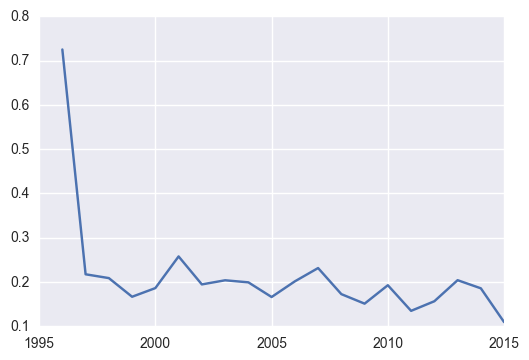

In [124]:
plt.plot(novv)


In [125]:
nov_release.sum() / total_releases.sum()

0.19263157894736843

In [126]:
tt = df.release_month.value_counts().sum()
nn = (df.release_month.value_counts())[11]
nn/tt

0.18975024326954265

## When did PC games gain popularity over Console games?

What is a good metric to determine popularity in PC games? Number of Releases or Global Sales

In [127]:
df.Platform.value_counts()

PlayStation 2           971
Xbox 360                698
PlayStation 3           602
Nintendo DS             579
Xbox                    569
PC                      501
Wii                     458
GameCube                350
PlayStation             327
PlayStation Portable    303
Game Boy Advance        276
Nintendo 64             159
PlayStation 4           104
Xbox One                 89
Nintendo 3DS             73
Wii U                    56
PlayStation Vita         37
Dreamcast                14
Name: Platform, dtype: int64

In [128]:
dict_pc_con = {'console': ['PS2', 'X360', 'PS3', 'XB','PS', 'Wii','PS4','XOne','WiiU']
               , 'PC':'PC'}


df['Standard_Plat'].map(dict_pc_con)

0       NaN
1       NaN
2       NaN
3        PC
4       NaN
5       NaN
7       NaN
8        PC
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17       PC
18      NaN
19      NaN
21      NaN
22      NaN
23       PC
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
30       PC
31      NaN
       ... 
7468    NaN
7469     PC
7470     PC
7472    NaN
7474     PC
7475    NaN
7476     PC
7477    NaN
7478    NaN
7479    NaN
7481    NaN
7482     PC
7483    NaN
7484    NaN
7485     PC
7486    NaN
7487    NaN
7488    NaN
7489     PC
7490    NaN
7491    NaN
7492     PC
7493    NaN
7494    NaN
7495    NaN
7496    NaN
7497    NaN
7498    NaN
7499    NaN
7500    NaN
Name: Standard_Plat, dtype: object

## More releases more sales? Are these numbers correlated at all

In [129]:
num_of_releases = df.groupby(['Year_of_Release_Sales'])['Name'].size()

In [130]:
gb_sales = df.groupby(['Year_of_Release_Sales'])['Global_Sales'].sum()

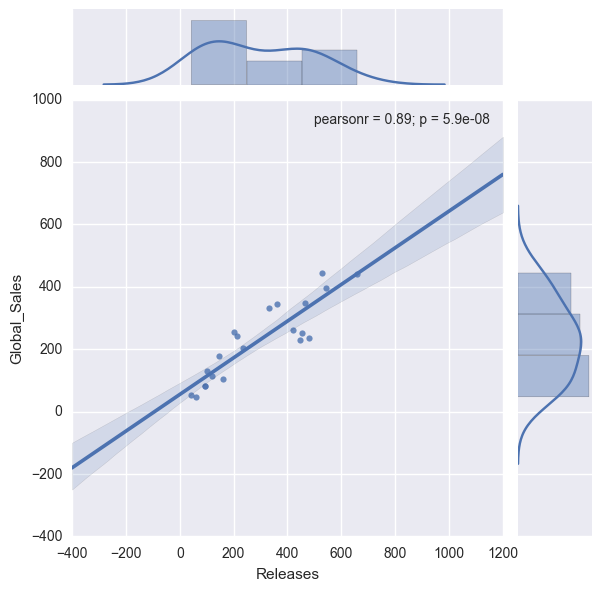

In [131]:
rr= pd.concat([num_of_releases, gb_sales], axis=1, keys=['Releases', 'Global_Sales'])
sns.jointplot(x='Releases', y='Global_Sales', data=rr, kind='reg')